<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

import tensorflow as tf
import random
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Dataset\student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.shape

(1000, 16)

In [4]:
df.nunique()

student_id                       1000
age                                 8
gender                              3
study_hours_per_day                78
social_media_hours                 60
netflix_hours                      51
part_time_job                       2
attendance_percentage             320
sleep_hours                        68
diet_quality                        3
exercise_frequency                  7
parental_education_level            3
internet_quality                    3
mental_health_rating               10
extracurricular_participation       2
exam_score                        480
dtype: int64

In [5]:
df['gender'].value_counts()

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [7]:
df[df['parental_education_level'].isna()]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,S1033,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,S1047,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,S1074,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,S1093,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,S1921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,S1925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,S1939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [8]:
df['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor', nan], dtype=object)

In [9]:
df['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [10]:
# Fill missing values with the mode
df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)

In [11]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [12]:
df.duplicated().sum()

0

<h2>EDA</h2>

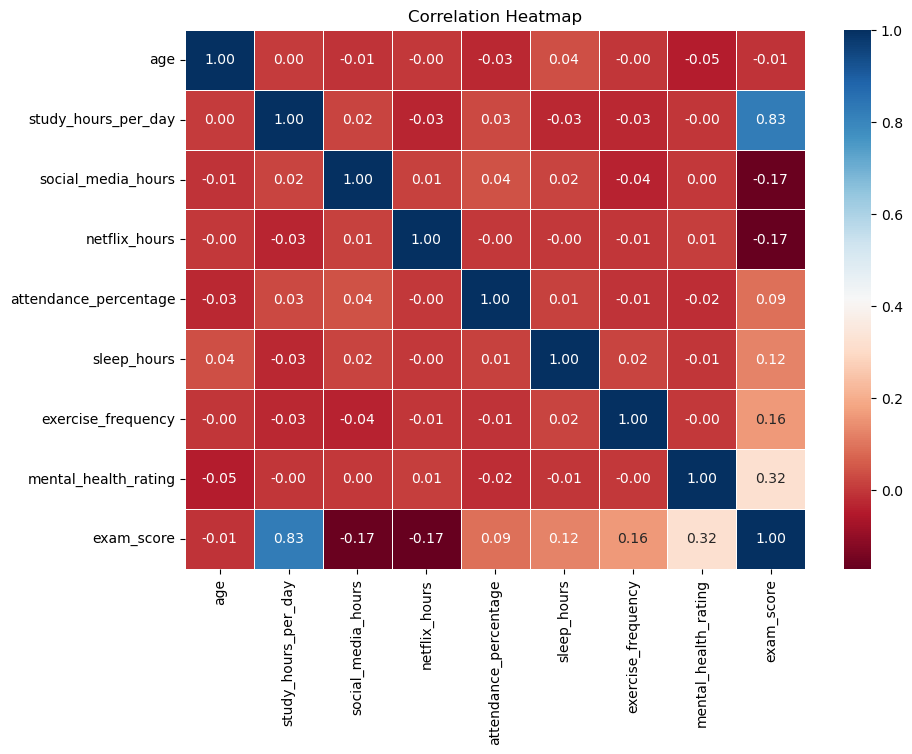

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = 'RdBu', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show();

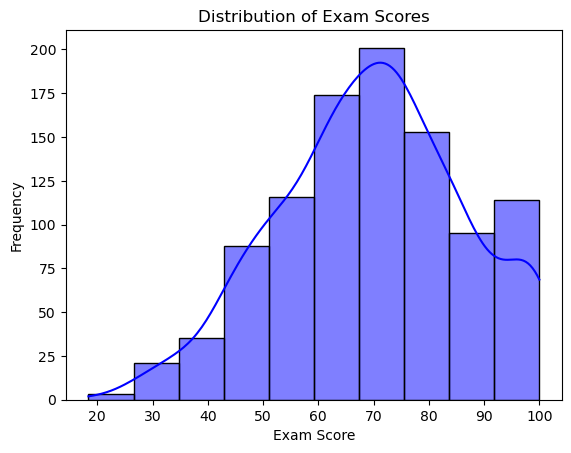

In [14]:
sns.histplot(df['exam_score'], bins=10, kde=True, color='blue')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.show()

<Axes: xlabel='exam_score', ylabel='study_hours_per_day'>

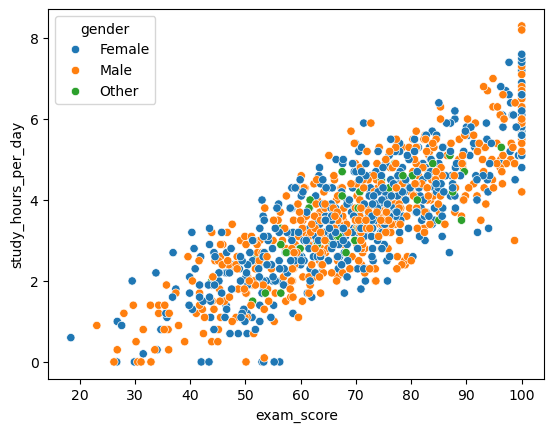

In [15]:
sns.scatterplot(df, y='study_hours_per_day', x='exam_score', hue='gender')

<Axes: xlabel='exam_score', ylabel='study_hours_per_day'>

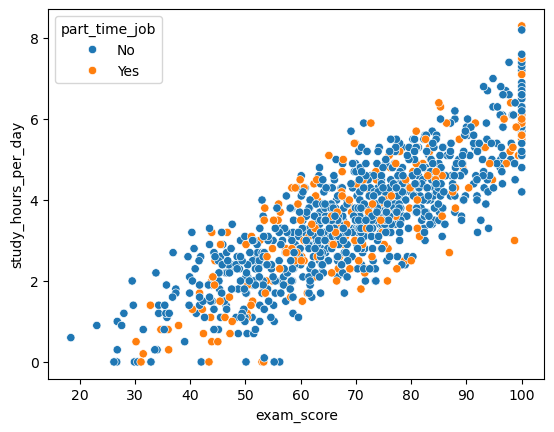

In [16]:
sns.scatterplot(df, y='study_hours_per_day', x='exam_score', hue='part_time_job')

<Axes: xlabel='exam_score', ylabel='study_hours_per_day'>

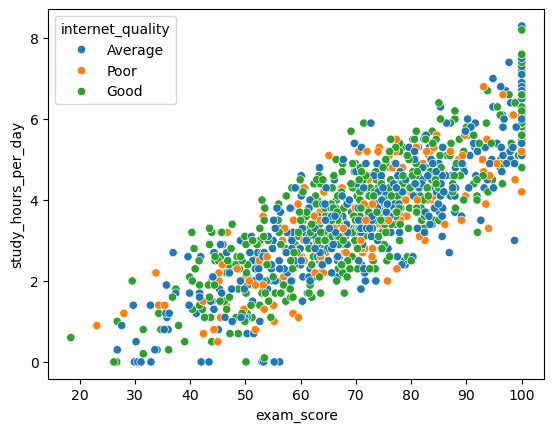

In [17]:
sns.scatterplot(df, y='study_hours_per_day', x='exam_score', hue='internet_quality')

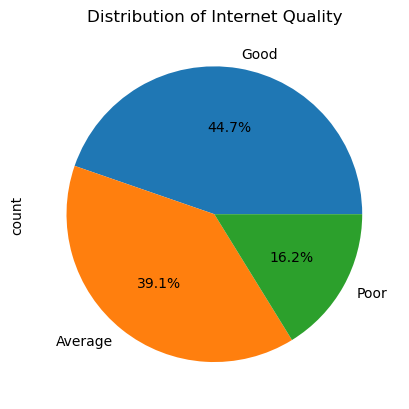

In [18]:
df['internet_quality'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Internet Quality')
plt.show();

<Axes: xlabel='exam_score', ylabel='attendance_percentage'>

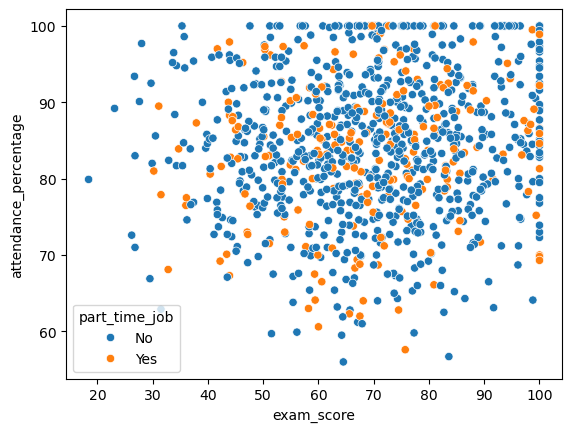

In [19]:
sns.scatterplot(df, y='attendance_percentage', x='exam_score', hue='part_time_job')

<h2>Feature Engineering</h2>

In [20]:
df['on_screen_time'] = df['social_media_hours'] + df['netflix_hours']
df = df.drop(['social_media_hours','netflix_hours', 'student_id'], axis=1)

In [21]:
df['study_sleep_ratio'] = df['study_hours_per_day'] / df['sleep_hours']
df['social_academic_ratio'] = df['on_screen_time'] / df['study_hours_per_day'].replace(0, 0.01)

In [22]:
df["avg_lifestyle_score"] = (df["sleep_hours"] + df["exercise_frequency"] + df["mental_health_rating"]) / 3

In [23]:
le = LabelEncoder()

for col in ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']:
    df[col] = le.fit_transform(df[col])  # Encode categorical values

In [24]:
df.head()

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,on_screen_time,study_sleep_ratio,social_academic_ratio,avg_lifestyle_score
0,23,0,0.0,0,85.0,8.0,0,6,2,0,8,1,56.2,2.3,0.000000,230.000000,7.333333
1,20,0,6.9,0,97.3,4.6,1,6,1,0,8,0,100.0,5.1,1.500000,0.739130,6.200000
2,21,1,1.4,0,94.8,8.0,2,1,1,2,1,0,34.3,4.4,0.175000,3.142857,3.333333
3,23,0,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8,4.9,0.108696,4.900000,4.733333
4,19,0,5.0,0,90.9,4.9,0,3,2,1,1,0,66.4,4.9,1.020408,0.980000,2.966667


In [25]:
df.shape

(1000, 17)

<h2>Data Splitting</h2>

In [26]:
x = df.drop('exam_score', axis=1)
y = df['exam_score']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<h2>Machine Learning</h2>

In [29]:
ad = AdaBoostRegressor(random_state=42)
ad.fit(x_train, y_train)
r2_train = ad.score(x_train, y_train)

# Make predictions
y_pred = ad.predict(x_test)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


R-squared(Train): 0.8884
R-squared(Test): 0.8513
MAE: 4.9984
RMSE: 6.1743


In [30]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': ad.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                          Feature  Importance
2             study_hours_per_day    0.457029
14          social_academic_ratio    0.273546
15            avg_lifestyle_score    0.193639
10           mental_health_rating    0.042846
5                     sleep_hours    0.013661
4           attendance_percentage    0.007730
13              study_sleep_ratio    0.005812
12                 on_screen_time    0.004923
6                    diet_quality    0.000303
8        parental_education_level    0.000288
3                   part_time_job    0.000223
0                             age    0.000000
1                          gender    0.000000
7              exercise_frequency    0.000000
9                internet_quality    0.000000
11  extracurricular_participation    0.000000


In [31]:
df2 = df.drop(['diet_quality', 'parental_education_level', 'gender', 'internet_quality', 'extracurricular_participation', 
               'part_time_job', 'age', 'exercise_frequency'], axis=1)
x2 = df2.drop(['exam_score'], axis=1)
y2 = df2['exam_score']

In [32]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

In [33]:
ad2 = AdaBoostRegressor(random_state=42)
ad2.fit(x_train2, y_train2)
r2_train = ad2.score(x_train2, y_train2)

# Make predictions
y_pred2 = ad2.predict(x_test2)
r2_test = r2_score(y_test2, y_pred2)
mae = mean_absolute_error(y_test2, y_pred2)
rmse = mean_squared_error(y_test2, y_pred2, squared=False)

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared(Train): 0.8910
R-squared(Test): 0.8611
MAE: 4.8544
RMSE: 5.9691


In [34]:
lr = LinearRegression()
lr.fit(x_train, y_train)
r2_train = lr.score(x_train, y_train)

# Make predictions
y_pred = lr.predict(x_test)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


R-squared(Train): 0.9016
R-squared(Test): 0.8963
MAE: 4.1985
RMSE: 5.1565


In [35]:
joblib.dump(lr, 'LR_model.pkl')
print('LR_model saved succesfully!')

LR_model saved succesfully!


<h2>Deep Learning</h2>

In [36]:
tf.random.set_seed(42)

DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

# Compile the model
DL_model.compile(optimizer='Adam', loss='mse', metrics=['mae'])


# Train the model
history = DL_model.fit(x_train, y_train, epochs=200, batch_size=16, validation_data=(x_test, y_test))  

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4412.1880 - mae: 64.0600 - val_loss: 2006.7543 - val_mae: 41.8948
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1423.5486 - mae: 33.5497 - val_loss: 294.6866 - val_mae: 13.6371
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 272.8532 - mae: 12.5103 - val_loss: 182.6842 - val_mae: 10.5189
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 195.3228 - mae: 10.4394 - val_loss: 151.4689 - val_mae: 9.6483
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159.5513 - mae: 9.6366 - val_loss: 139.1689 - val_mae: 9.2794
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141.8840 - mae: 9.1485 - val_loss: 132.7495 - val_mae: 9.0558
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127.5189 - mae: 8.7667 - val_loss: 126.8916 - val_mae: 8.8710
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.6571 - mae: 8.7367 - val_loss: 122.0273 - val_mae: 8.7026
Epoch 9/200
50/50 ━━━

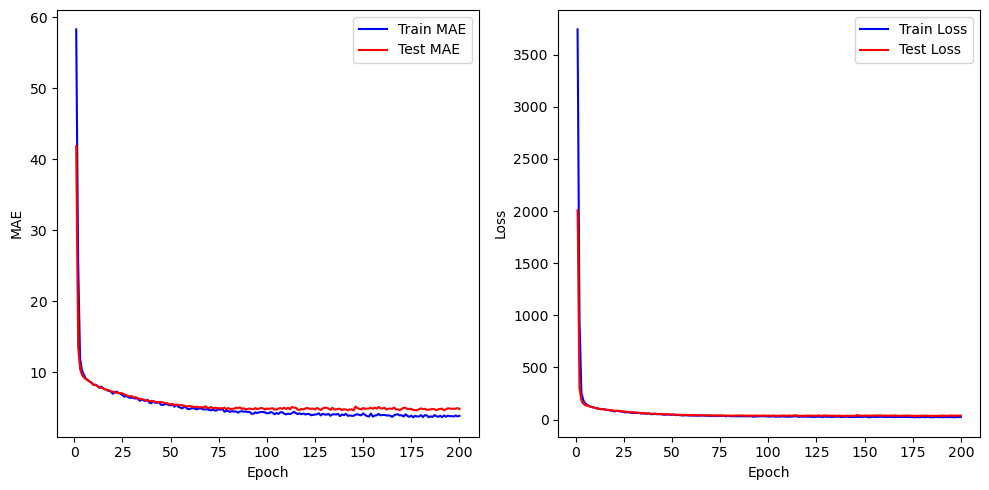

In [37]:
# learning curve
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Test MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()

plt.show();

In [38]:
y_pred = DL_model.predict(x_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Root Mean Squared Error (RMSE): 6.1288
Mean Absolute Error (MAE): 4.8477
R-squared (R2): 0.8535


In [39]:
# Save DL model
DL_model.save('DL_model.keras')
print('DL model saved succeefully!')

DL model saved succeefully!


<h2>Machine Learning vs Deep Learning</h2>

In [41]:
# Load Models
LR_model = joblib.load('LR_model.pkl')
DL_model = load_model('DL_model.keras')

# get user input
age = int(input("Enter age of student: "))
gender = float(input("Enter gender with integer, Female (0), Male (1), Other (2): "))
study_hours_per_day = float(input("Enter the average of daily study hours: "))
part_time_job = int(input("Any part_time_job? No (0), Yes(1): "))
attendance_percentage = float(input("Enter the attendance percentage: "))    
sleep_hours = float(input("Enter the average of daily sleep hours: "))     
diet_quality = int(input("Enter diet_quality in integer, Fair (0), Good(1), Poor(2): ")) 
exercise_frequency = int(input("Enter the execrise freuqency per week: "))  
parental_education_level = int(input("Enter the parental_education_level in integer, Bachelor (0), High School (1), Master (2): "))
internet_quality = int(input("Enter the internet quality in integer, Average (0), Good (1), Poor (2): "))  
mental_health_rating = int(input("Enter the mental health rating from scale 1-10: "))  
extracurricular_participation =  int(input("Participate in extracurricular? No (0), Yes(1):: "))  
on_screen_time = float(input("Enter the average daily time in scoial media and netflix: "))  
study_sleep_ratio = on_screen_time / sleep_hours
social_academic_ratio = on_screen_time / (0.01 if study_hours_per_day == 0 else study_hours_per_day)
avg_lifestyle_score = (sleep_hours + exercise_frequency + mental_health_rating) / 3

# Make predictions
new_data = [[age, gender, study_hours_per_day, part_time_job, attendance_percentage, sleep_hours, diet_quality, exercise_frequency, 
             parental_education_level, internet_quality, mental_health_rating, extracurricular_participation, on_screen_time, study_sleep_ratio, 
             social_academic_ratio, avg_lifestyle_score]]
transformed_new_data = scaler.transform(new_data)
LR_prediction = LR_model.predict(transformed_new_data)
DL_prediction = DL_model.predict(transformed_new_data)

print('')
print("LR predicted exam score: ", LR_prediction)
print("DL predicted exam score: ", DL_prediction)

Enter age of student:  21
Enter gender with integer, Female (0), Male (1), Other (2):  1
Enter the average of daily study hours:  5.5
Any part_time_job? No (0), Yes(1):  0
Enter the attendance percentage:  96
Enter the average of daily sleep hours:  7
Enter diet_quality in integer, Fair (0), Good(1), Poor(2):  0
Enter the execrise freuqency per week:  1
Enter the parental_education_level in integer, Bachelor (0), High School (1), Master (2):  1
Enter the internet quality in integer, Average (0), Good (1), Poor (2):  1
Enter the mental health rating from scale 1-10:  3
Participate in extracurricular? No (0), Yes(1)::  0
Enter the average daily time in scoial media and netflix:  4.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

LR predicted exam score:  [83.0094135]
DL predicted exam score:  [[80.93295]]
